In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initialization complete


In [3]:
ramp_voltages(SRC=1.5/8, LB=3.72/8, RB=3.28/8, TG=14.4/8, TGAC=-6.3/8, DF=3.905/8, DS=5.17945/8)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

<IPython.core.display.Javascript object>


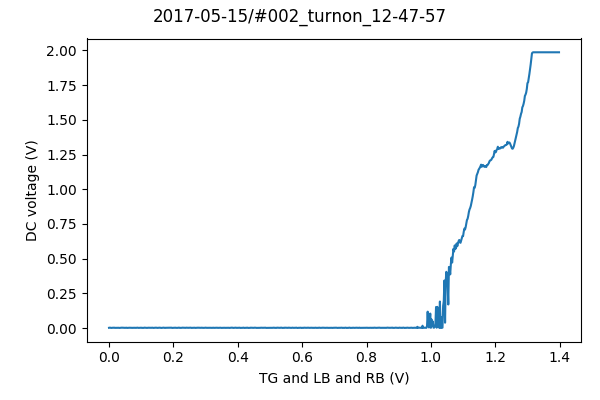

DataSet:
   data = load_data('2017-05-15/#002_turnon_12-47-57')
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-15 12:47:57


In [5]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

# Pinchoff

In [2]:
pinchoff_parameter = LB

vals = list(np.arange(1.25, 0, -0.002))

turnon_parameter(vals[0])
len(vals)

625

<IPython.core.display.Javascript object>


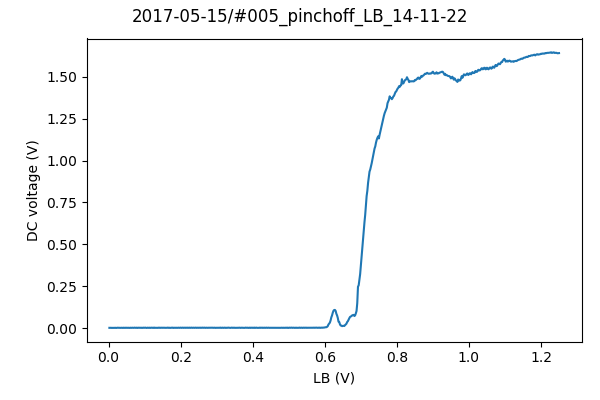

DataSet:
   data = load_data('2017-05-15/#005_pinchoff_LB_14-11-22')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LB_set     | LB           | (625,)
   Measured | DC_voltage | DC_voltage   | (625,)
started at 2017-05-15 14:11:22


In [3]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

# 1D Coulomb

In [4]:
vals = TG.sweep(1.4, 1.9, step=0.0008)

<IPython.core.display.Javascript object>


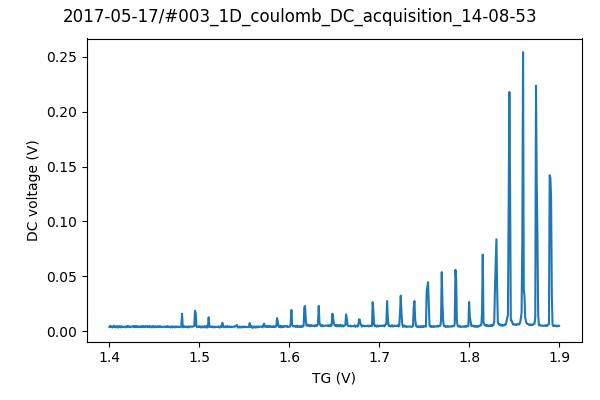

DataSet:
   data = load_data('2017-05-17/#003_1D_coulomb_DC_acquisition_14-08-53')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (626,)
   Measured | DC_voltage | DC_voltage   | (626,)
started at 2017-05-17 14:08:53


In [7]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

In [36]:

step_vals = np.arange(-0.15, 0.16, 0.05)
offset = (0.55, 0.55)

barrier_vals = np.zeros((2, len(step_vals)))
for k, step in enumerate(step_vals):
    barrier_vals[0,k] = offset[0] + step
    barrier_vals[1, k] = offset[1] - step

barrier_vals = barrier_vals.transpose()

In [49]:

step = 0.04
offset_vals = np.arange(0.35, 0.551, 0.05)

barrier_vals = np.zeros((2, len(offset_vals)))
for k, offset in enumerate(offset_vals):
    barrier_vals[0,k] = offset + step
    barrier_vals[1, k] = offset - step

barrier_vals = barrier_vals.transpose()

In [51]:
DC_parameter.setup()
loop = Loop(TG.sweep(1.15, 1.9, num=7)).loop(
    combine(LB, RB, name='LB_RB').sweep(barrier_vals)).loop(
        parameter[vals]).each(
            DC_parameter)
data = loop.get_data_set(name=f'TG_LB_RB_coulomb_{parameter.name}')
loop.run();

layout.stop()
# parameter(vals[0])

DataSet:
   data = load_data('2017-05-15/#029_TG_LB_RB_coulomb_DF_DS_20-58-23')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (7,)
   Setpoint | LB_RB_set  | LB_RB        | (7, 5)
   Setpoint | DF_DS_set  | DF_DS        | (7, 5, 900)
   Measured | DC_voltage | DC_voltage   | (7, 5, 900)
   Measured | LB         | LB           | (7, 5)
   Measured | RB         | RB           | (7, 5)
started at 2017-05-15 20:58:23


# 2D scans

In [8]:
x_vals = DF_DS.sweep(0, 0.7,  num=400)
y_vals = TGAC.sweep(-0.3, 0.3, num=300)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X400 x Y300


In [5]:
TG(1.9)

<IPython.core.display.Javascript object>


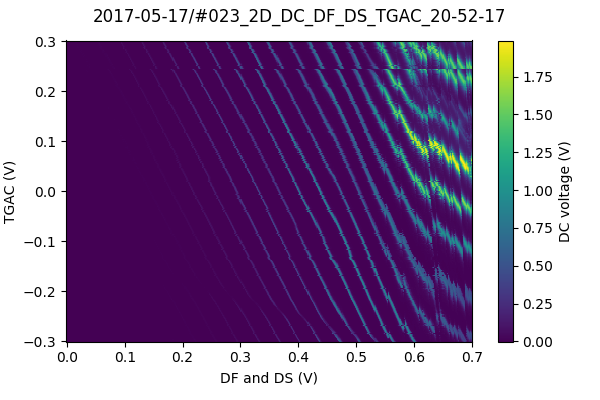

DataSet:
   data = load_data('2017-05-17/#023_2D_DC_DF_DS_TGAC_20-52-17')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (300,)
   Setpoint | DF_DS_set  | DF_DS        | (300, 400)
   Measured | DC_voltage | DC_voltage   | (300, 400)
Started at 2017-05-17 20:52:19
Finished at 2017-05-18 08:28:37


In [9]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
TGAC(0)
DF_DS(0)

# Continuous single point scan

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Variable read scan

In [2]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

<IPython.core.display.Javascript object>


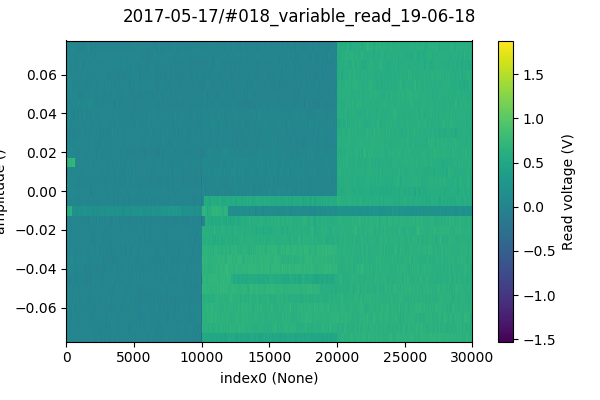

DataSet:
   data = load_data('2017-05-17/#018_variable_read_19-06-18')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (31,)
   Setpoint | index0_set    | index0       | (31, 30000)
   Measured | read_voltage  | read_voltage | (31, 30000)
Started at 2017-05-17 19:06:19
Finished at 2017-05-17 19:08:15


DataSet:
   data = load_data('2017-05-17/#018_variable_read_19-06-18')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (31,)
   Setpoint | index0_set    | index0       | (31, 30000)
   Measured | read_voltage  | read_voltage | (31, 30000)

In [4]:
read_voltage.samples = 20
loop = Loop(read_voltage.sweep(-0.075, 0.075, num=31)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run()

In [2]:
from silq.parameters.acquisition_parameters import *

class VariableReadParameter(AcquisitionParameter):
    def __init__(self, **kwargs):
        super().__init__(name='variable_read_acquisition',
                         names=('read_voltage', ),
                         labels=('Read voltage', ),
                         units=['V'],
                         snapshot_value=False,
                         **kwargs)
        self.pulse_sequence.add(
            DCPulse(name='empty', acquire=True, average='trace',
                    connection_label='stage'),
            DCPulse(name='plunge', acquire=True, average='trace',
                    connection_label='stage'),
            DCPulse(name='read', acquire=True, average='trace',
                    connection_label='stage'),
            DCPulse(name='final',
                    connection_label='stage'))

    @property
    def shapes(self):
        return (self.layout.acquisition.shapes[0][1],),

    @shapes.setter
    def shapes(self, shapes):
        pass
    
    def get(self):
        self.setup()

        self.acquire(segment_traces=False)

        self.results = np.mean(self.data['acquisition_traces']['output'],
                               axis=0)

        return self.results,
